___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Car Price Prediction Project

Welcome to "***Car Price Prediction Project***". This is our first medium project of ***Machine Learning*** course. In this project we had the opportunity to apply many algorithms commonly used for regression problems.

Also, we applied various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that we used in algorithm modeling and prediction processes in Python with ***scikit-learn***. 



# Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. 


---

In this Senario, we are estimating the prices of cars using regression algorithms.

While starting we have imported the necessary modules and loaded the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that we implemented ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you have added bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. We measured the success of our models with regression evaluation metrics as well as with cross validation method.

For the better results, we tried to increase the success of our models by performing hyperparameter tuning. Determined the feature importances for the model. We set our model with the most important features for resource saving. We tried to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, we performed hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally we compared the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew
import scipy.stats as stats
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [3]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013,80000,83450,73000,16200
Type,Used,Used,Used,Used,Used
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid...","Air suspension,Armrest,Auxiliary heating,Elect...","Air conditioning,Armrest,Automatic climate con..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer","Bluetooth,CD player,Hands-free equipment,MP3,O...","Bluetooth,CD player,Hands-free equipment,MP3,O..."
Extras,"Alloy wheels,Catalytic Converter,Voice Control","Alloy wheels,Sport seats,Sport suspension,Voic...","Alloy wheels,Voice Control","Alloy wheels,Sport seats,Voice Control","Alloy wheels,Sport package,Sport suspension,Vo..."
Safety_Security,"ABS,Central door lock,Daytime running lights,D...","ABS,Central door lock,Central door lock with r...","ABS,Central door lock,Daytime running lights,D...","ABS,Alarm system,Central door lock with remote...","ABS,Central door lock,Driver-side airbag,Elect..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   body_type            15909 non-null  object 
 2   price                15909 non-null  int64  
 3   km                   15909 non-null  float64
 4   Type                 15909 non-null  object 
 5   Fuel                 15909 non-null  object 
 6   Comfort_Convenience  15909 non-null  object 
 7   Entertainment_Media  15909 non-null  object 
 8   Extras               15909 non-null  object 
 9   Safety_Security      15909 non-null  object 
 10  Gears                15909 non-null  float64
 11  age                  15909 non-null  float64
 12  Previous_Owners      15909 non-null  float64
 13  hp_kW                15909 non-null  float64
 14  Inspection_new       15909 non-null  int64  
 15  Paint_Type           15909 non-null 

In [5]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
count,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000
mean,18020.241876,32092.436526,5.937268,1.389591,1.042869,88.497769,0.247156,1428.657364,1337.675467,4.824329,117.783110
std,7377.200813,36982.838757,0.704943,1.121355,0.339241,26.666504,0.431372,275.852413,199.672043,0.887890,18.022786
min,4950.000000,0.000000,5.000000,0.000000,0.000000,51.000000,0.000000,890.000000,840.000000,3.000000,45.000000
25%,12850.000000,1913.000000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.000000,104.000000
50%,16900.000000,20410.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000,117.000000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000,129.000000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000,253.000000


In [6]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'Type', 'Fuel',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'Gears', 'age', 'Previous_Owners', 'hp_kW',
       'Inspection_new', 'Paint_Type', 'Upholstery_type', 'Gearing_Type',
       'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb',
       'CO2_Emission'],
      dtype='object')

## Feature Engineering

In [7]:
df.select_dtypes("object").head()

,make_model,body_type,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [8]:
for col in df.select_dtypes('object').columns:
    print(f"{col:<20}:", df[col].nunique())

make_model          : 8
body_type           : 8
Type                : 5
Fuel                : 3
Comfort_Convenience : 6193
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4439
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


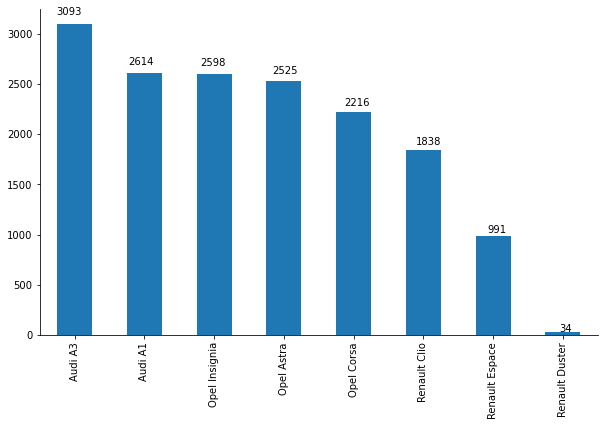

In [9]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [10]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,km,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission


In [11]:
df.drop(index = [2614], inplace = True)

In [12]:
df.shape

(15908, 23)

<AxesSubplot:xlabel='price', ylabel='Count'>

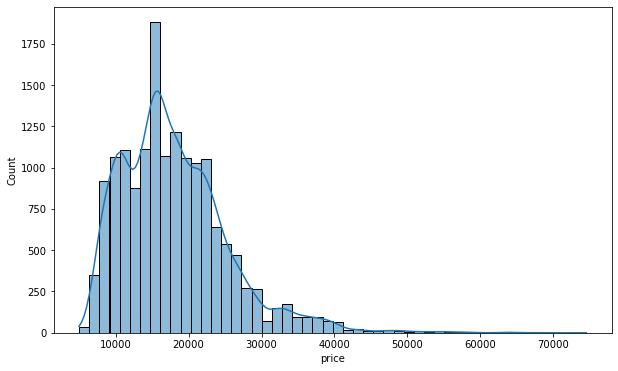

In [13]:
sns.histplot(df.price, bins = 50, kde=True)

In [14]:
skew(df.price)

1.2368422521321827

In [15]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,99.0
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,129.0
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,99.0
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,99.0
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,109.0
...,...,...,...,...,...,...,...,...,...,...,...
15904,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,139.0
15905,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4,168.0
15906,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3,139.0
15907,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,139.0


<AxesSubplot:>

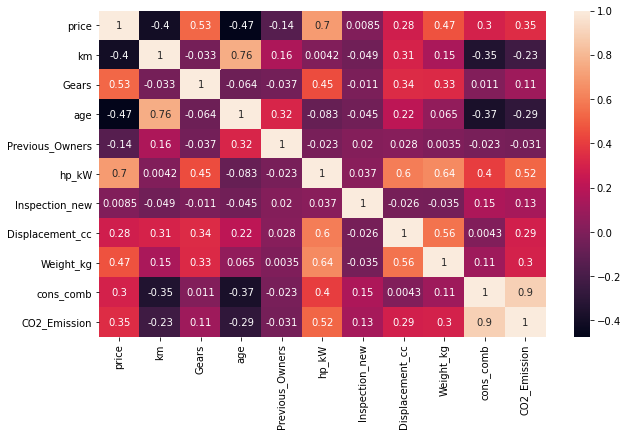

In [16]:
sns.heatmap(df_numeric.corr(), annot=True)

## multicollinearity control

In [17]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [18]:
df_numeric.corr()[(df_numeric.corr() <= -0.9) & (df_numeric.corr() > -1)].any().any()

False

In [19]:
# 0.9'dan büyük ve 1'den kücük olanlara bakil multicollinarity olmadigini gördük.

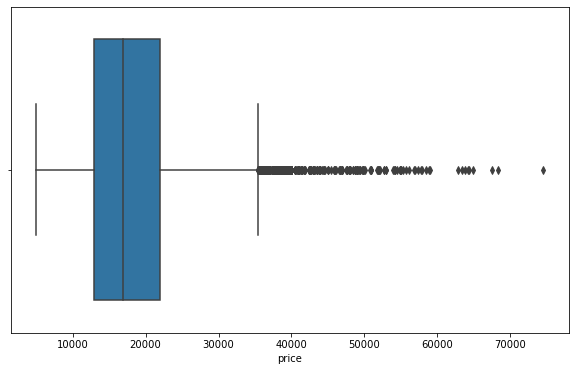

In [20]:
sns.boxplot(df.price);
#Buradaki outlier'lar faydali mi degil mi analiz etmemiz gerekir.

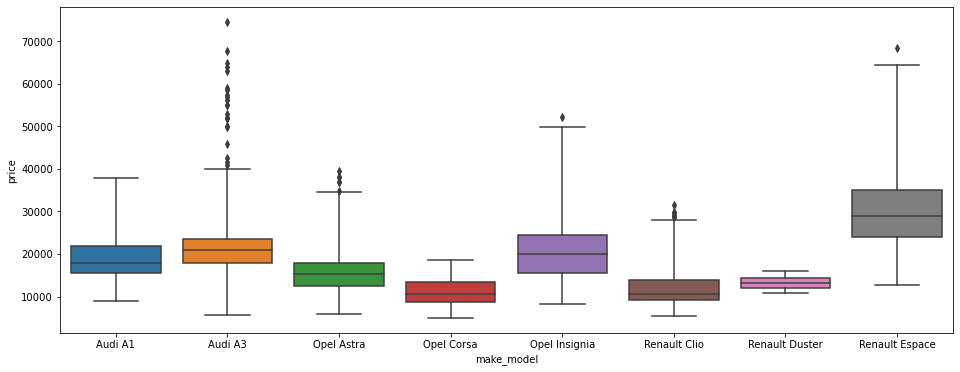

In [21]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## Get dummies 

In [22]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [23]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [24]:
df = pd.get_dummies(df, drop_first =True)

In [25]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,99.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,129.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,99.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,99.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,109.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,

In [26]:
df.shape

(15908, 132)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15908 entries, 0 to 15908
Columns: 132 entries, price to Drive_chain_rear
dtypes: float64(9), int64(96), uint8(27)
memory usage: 13.9 MB


In [28]:
df.isnull().any().any()

False

In [29]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.473726
Gearing_Type_Manual                        -0.431790
km                                         -0.399476
make_model_Opel Corsa                      -0.379498
Type_Used                                  -0.366884
make_model_Renault Clio                    -0.297812
Drive_chain_front                          -0.155905
Previous_Owners                            -0.144684
make_model_Opel Astra                      -0.128352
em_CD player                               -0.093379
em_On-board computer                       -0.077316
ss_Central door lock with remote control   -0.070240
ss_Fog lights                              -0.053368
Paint_Type_Perl effect                     -0.049907
ss_Isofix                                  -0.045998
body_type_Sedans                           -0.044708
ss_Central door lock                       -0.043959
ss_Power steering                          -0.041642
ss_Head airbag                             -0.

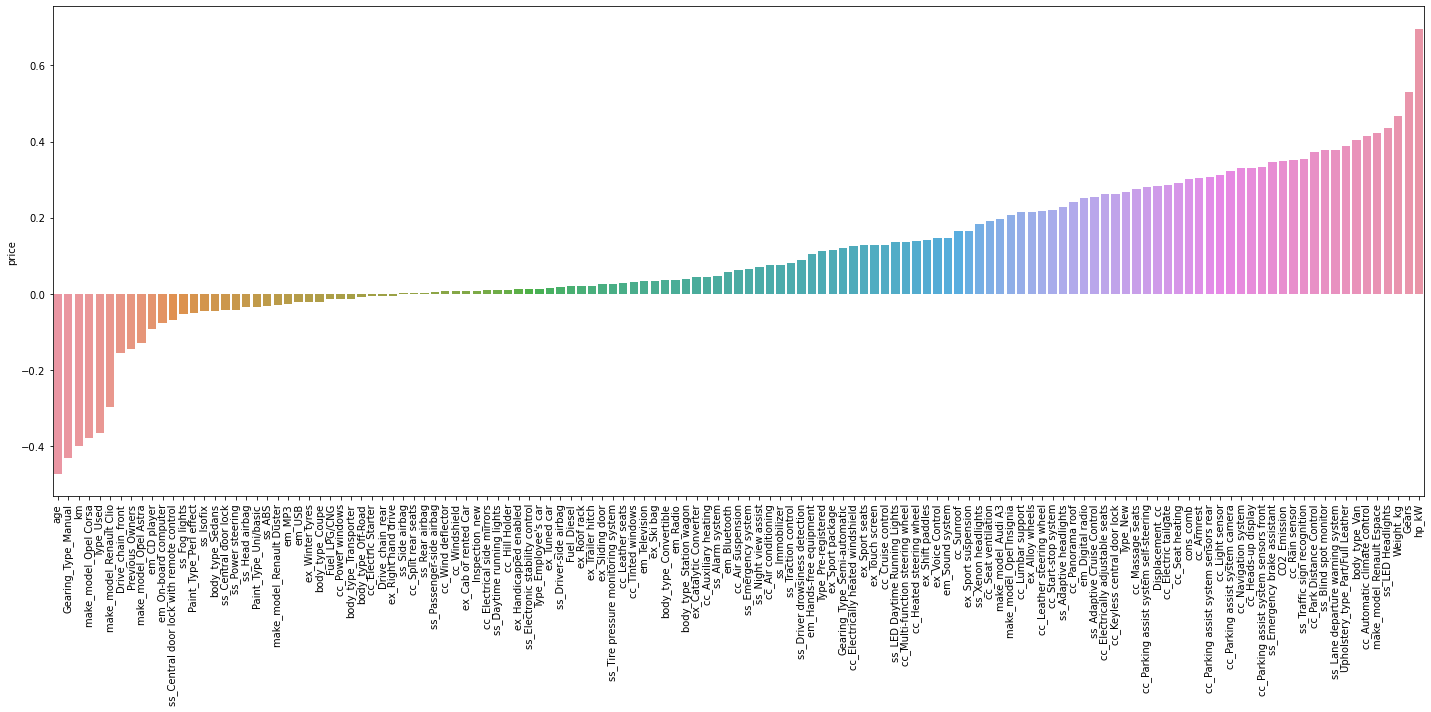

In [30]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [31]:
X = df.drop("price", axis =1)
y = df["price"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
X_train.shape

(11135, 131)

In [34]:
X_test.shape

(4773, 131)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [35]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [36]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lm.predict(X_test)

In [39]:
y_train_pred = lm.predict(X_train)

In [40]:
pd.options.display.float_format = '{:.3f}'.format

In [41]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.890
mae,1693.199,1721.099
mse,5949321.396,5976567.672
rmse,2439.123,2444.702


## Cross Validate

In [42]:
#Datasetimizin farkli yerlerinden train sample'lari alarak daha realist sonuc almak icin CV yapilir.
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [43]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.142,0.006,0.879,-1791.923,-6931224.846,-2632.722
1,0.166,0.005,0.884,-1720.761,-6214272.076,-2492.844
2,0.125,0.006,0.880,-1673.919,-6420964.942,-2533.962
3,0.134,0.006,0.885,-1789.249,-7140653.140,-2672.200
4,0.128,0.005,0.892,-1718.831,-5693270.835,-2386.058
5,0.118,0.005,0.893,-1692.512,-5899511.301,-2428.891
6,0.121,0.005,0.886,-1703.878,-5481483.686,-2341.257
7,0.175,0.007,0.882,-1809.222,-7098823.569,-2664.362
8,0.166,0.005,0.897,-1635.869,-5233569.516,-2287.700
9,0.110,0.004,0.888,-1651.193,-5598646.539,-2366.146


In [44]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.887
test_neg_mean_absolute_error          -1718.736
test_neg_mean_squared_error        -6171242.045
test_neg_root_mean_squared_error      -2480.614
dtype: float64

In [45]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8898065958754301
MAE 		: 1721.0987480154804
MSE 		: 5976567.672475319
RMSE 		: 2444.701959846091


In [46]:
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Prediction Error

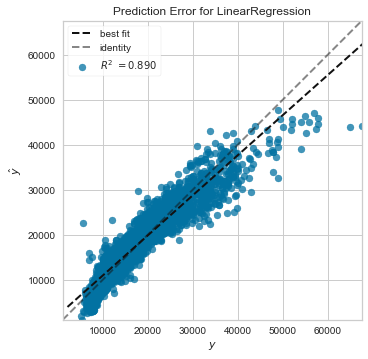

In [47]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() ;

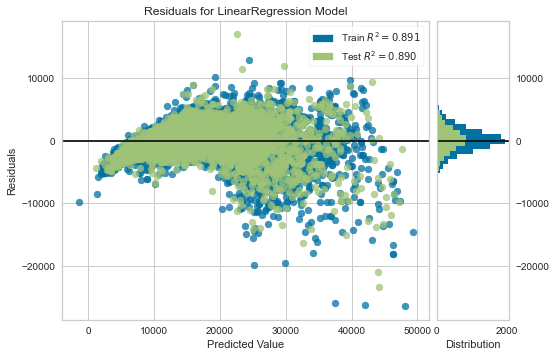

In [48]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()      ;
#Residual dagilimi normal dagilim oldugundan lineer regression'a uygun bir durum.
#Yapmamiz gereken outlier'lar üzerinden biraz calismak, cünkü üst tarafta hatalar artiyor.

In [49]:
df.price.mean()

18020.68990445059

In [50]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [51]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
9274,14213,17195.572,-2982.572
14555,10389,14576.286,-4187.286
14938,26900,30017.969,-3117.969
11428,19770,23438.651,-3668.651
3705,22290,22216.339,73.661
13381,9690,8848.941,841.059
4911,20900,19384.659,1515.341
5573,23600,23445.302,154.698
10664,13890,16096.683,-2206.683
8151,18480,18857.297,-377.297


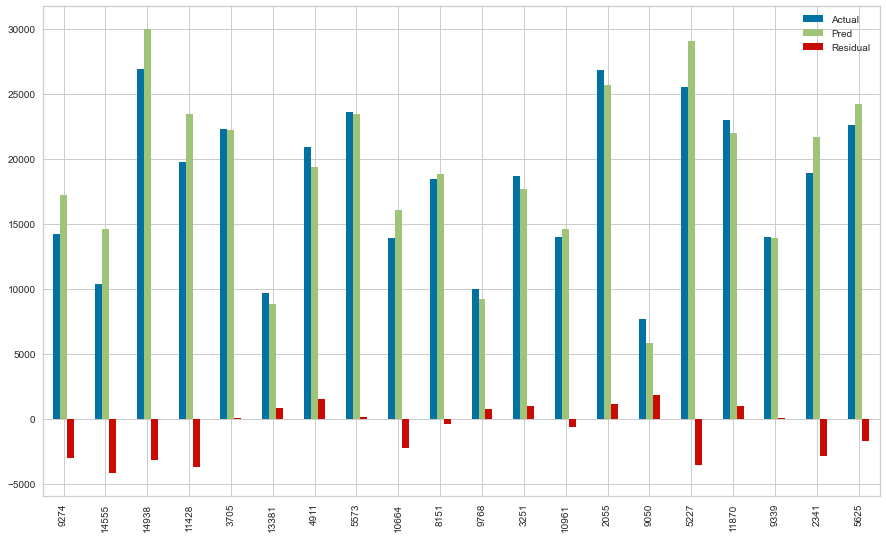

In [52]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [53]:
pd.DataFrame(lm.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-7660.904
make_model_Renault Clio,-5546.783
make_model_Opel Corsa,-5264.876
make_model_Opel Astra,-4046.785
Type_Employee's car,-2989.142
Type_Used,-2772.420
Type_Pre-registered,-2273.249
Drive_chain_rear,-2108.911
Drive_chain_front,-2083.108
age,-1636.543


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [54]:
scaler = MinMaxScaler()

In [55]:
scaler.fit(X_train)

MinMaxScaler()

In [56]:
X_train = scaler.transform(X_train)

In [57]:
#X-test'i kesinlikle tekrar etmiyoruz scalingde.
X_test = scaler.transform(X_test)

## Ridge

In [58]:
from sklearn.linear_model import Ridge, RidgeCV

In [59]:
ridge_model = Ridge()

In [60]:
ridge_model.fit(X_train, y_train)

Ridge()

In [61]:
y_pred = ridge_model.predict(X_test)

In [62]:
y_train_pred = ridge_model.predict(X_train)

In [63]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.890
mae,1691.957,1720.393
mse,5953281.890,5990002.187
rmse,2439.935,2447.448


In [64]:
#  Overfitting olmus olsaydi burada daha iyi sonuclarin cikmasini beklerdik.

## Finding best alpha for Ridge

In [65]:
alpha_space = np.linspace(0.01, 10, 10)
alpha_space

array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ])

In [66]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring='neg_root_mean_squared_error')
#  Gridsearch de kullanilabilir burada fakar ridgecv de kullanilabilir. Ayni sonucu verir.

In [67]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [68]:
ridge_cv_model.alpha_
# Alpha 0 olsaydi lineer regresiion ile aynisi cikardi.

0.01

In [69]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [70]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.890
mae,1693.181,1721.083
mse,5949321.898,5976651.208
rmse,2439.123,2444.719


In [71]:
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [72]:
pd.DataFrame(ridge_cv_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-11442.947
make_model_Renault Duster,-7653.335
CO2_Emission,-6976.133
make_model_Renault Clio,-5546.601
make_model_Opel Corsa,-5266.047
age,-4910.155
make_model_Opel Astra,-4046.374
Type_Employee's car,-2988.899
Type_Used,-2772.279
Type_Pre-registered,-2273.019


In [73]:
# Ridge'de coefficient'lar 0'lanmaz ama önemsizlik derecesine göre 0'a cok yaklastirilir.

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [74]:
from sklearn.linear_model import Lasso, LassoCV

In [75]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [76]:
y_train_pred = lasso_model.predict(X_train)

In [77]:
y_pred = lasso_model.predict(X_test)

In [78]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.890
mae,1694.895,1720.392
mse,5964590.286,5979025.754
rmse,2442.251,2445.205


## Finding best alpha for Lasso

In [79]:
lasso_cv_model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 100000, n_jobs =-1).fit(X_train, y_train)

In [80]:
lasso_cv_model.alpha_

1.12

In [81]:
y_train_pred = lasso_cv_model.predict(X_train)

In [82]:
y_pred = lasso_cv_model.predict(X_test)

In [83]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.890,0.890
mae,1695.227,1720.553
mse,5967826.437,5981110.353
rmse,2442.914,2445.631


In [84]:
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [85]:
pd.DataFrame(lasso_cv_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")
#Lasso'nun Ridge'den farki bazi coeeficient'lari 0'lara cekmesidir. Ayni sonucu veriyorsa da avantajlidir. Cünkü ayni sonucu daha az feature ile bulabiliriz.

,Coef
km,-11215.531
make_model_Renault Duster,-7611.039
make_model_Renault Clio,-5457.210
make_model_Opel Corsa,-5328.655
age,-4956.656
CO2_Emission,-4155.396
make_model_Opel Astra,-4022.861
Type_Employee's car,-2875.059
Type_Used,-2691.583
Type_Pre-registered,-2165.336


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [86]:
from sklearn.linear_model import ElasticNet
#ElasticNet ile Ridge ve Lasso arasinda optimizasyon yapiyoruz: l1_ratio=1 ise Lasso ile ayni sonuclar bulunur.
#l1_ratio = 0.5 ise hem Ridge'den hem de Lasso'dan faydalanir.


In [87]:
elastic_model = ElasticNet()
elastic_model.fit(X_train,y_train)

ElasticNet()

In [88]:
y_train_pred = elastic_model.predict(X_train)

In [89]:
y_pred = elastic_model.predict(X_test)

In [90]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.607,0.601
mae,3353.912,3335.954
mse,21409845.147,21667289.244
rmse,4627.077,4654.814


## Finding best alpha and l1_ratio for ElasticNet

In [91]:
from sklearn.model_selection import GridSearchCV
#GridsearchCV ile hyperparametre iyilestirmesi yapilir.

In [92]:
elastic_model = ElasticNet()

In [93]:
param_grid = {'alpha':[1, 2.03, 3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [94]:
grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [95]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1, 2.03, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [96]:
grid_model.best_estimator_

ElasticNet(alpha=1, l1_ratio=1)

In [97]:
y_train_pred = grid_model.predict(X_train)

In [98]:
y_pred = grid_model.predict(X_test)

In [99]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.890
mae,1694.895,1720.392
mse,5964590.286,5979025.754
rmse,2442.251,2445.205


In [100]:
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature İmportance

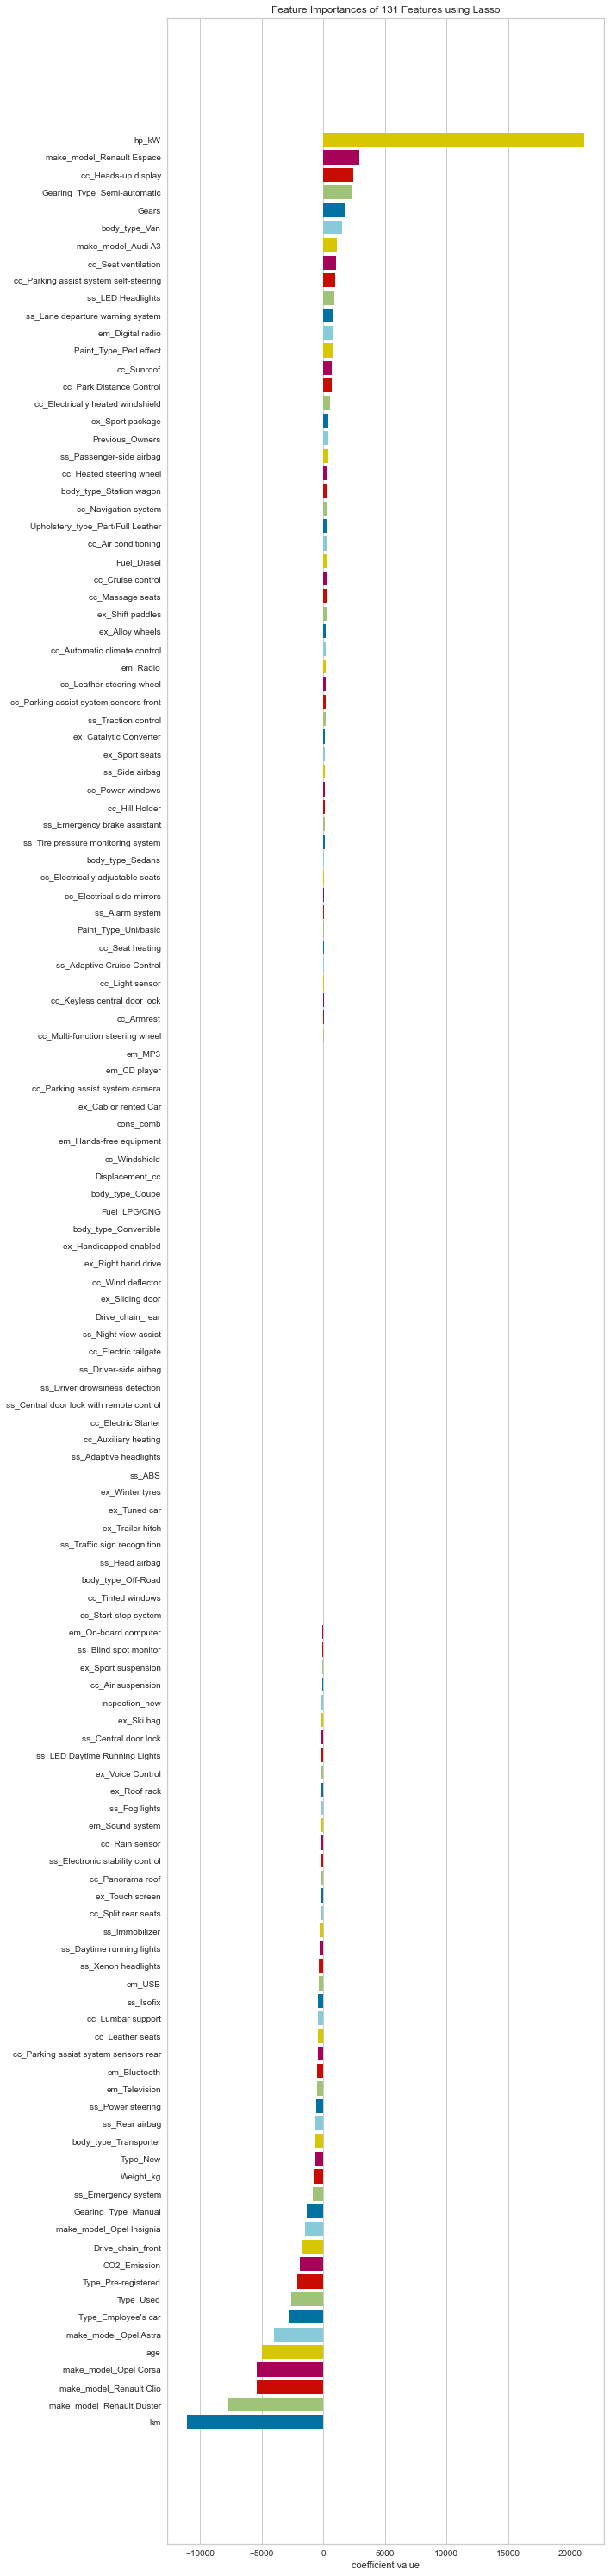

<AxesSubplot:title={'center':'Feature Importances of 131 Features using Lasso'}, xlabel='coefficient value'>

In [101]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=2.03), labels=df.drop(columns="price").columns, relative = False)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

In [102]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [103]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,99.000
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,129.000
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,99.000
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,99.000
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,109.000


In [104]:
df_new = df[["make_model", "hp_kW", "km","age", "price", "Gearing_Type"]]

In [105]:
df_new

,make_model,hp_kW,km,age,price,Gearing_Type
0,Audi A1,66.000,56013.000,3.000,15770,Automatic
1,Audi A1,141.000,80000.000,2.000,14500,Automatic
2,Audi A1,85.000,83450.000,3.000,14640,Automatic
3,Audi A1,66.000,73000.000,3.000,14500,Automatic
4,Audi A1,66.000,16200.000,3.000,16790,Automatic
...,...,...,...,...,...,...
15904,Renault Espace,147.000,1647.363,0.000,39950,Automatic
15905,Renault Espace,165.000,9900.000,0.000,39885,Automatic
15906,Renault Espace,146.000,15.000,0.000,39875,Automatic
15907,Renault Espace,147.000,10.000,0.000,39700,Automatic


In [106]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make_model    15909 non-null  object 
 1   hp_kW         15909 non-null  float64
 2   km            15909 non-null  float64
 3   age           15909 non-null  float64
 4   price         15909 non-null  int64  
 5   Gearing_Type  15909 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 745.9+ KB


In [107]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,price,Gearing_Type


In [108]:
df_new.drop(index=[2614], inplace =True)

In [109]:
df_new = pd.get_dummies(df_new)

In [110]:
df_new

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,147.000,1647.363,0.000,39950,0,0,0,0,0,0,0,1,1,0,0
15905,165.000,9900.000,0.000,39885,0,0,0,0,0,0,0,1,1,0,0
15906,146.000,15.000,0.000,39875,0,0,0,0,0,0,0,1,1,0,0
15907,147.000,10.000,0.000,39700,0,0,0,0,0,0,0,1,1,0,0


In [111]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [113]:
scaler = MinMaxScaler()

In [114]:
scaler.fit(X_train)

MinMaxScaler()

In [115]:
X_train = scaler.transform(X_train)

In [116]:
X_test = scaler.transform(X_test)

In [117]:
lasso_final_model = LassoCV(alphas = alpha_space, max_iter = 100000, cv =10)

In [118]:
lasso_final_model.fit(X_train, y_train)

LassoCV(alphas=array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ]),
        cv=10, max_iter=100000)

In [119]:
lasso_final_model.alpha_

0.01

In [120]:
y_train_pred = lasso_final_model.predict(X_train)
y_pred = lasso_final_model.predict(X_test)

In [121]:
train_val(y_train, y_train_pred, y_test, y_pred)
# 5 Feature ile %84 oraninda tahmin edebiliyoruz. Burada Trade-Off var: 135 adet feature ile % 89 mu? Yoksa 5 feature ile % 84 mü?

,train_set,test_set
R2,0.848,0.850
mae,1978.001,1978.897
mse,8292815.119,8141407.343
rmse,2879.725,2853.315


In [122]:
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [123]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.890,1721.099,2444.702
ridge_m,0.890,1721.083,2444.719
lasso_m,0.890,1720.553,2445.631
elastic_m,0.890,1720.392,2445.205
final_m,0.850,1978.897,2853.315


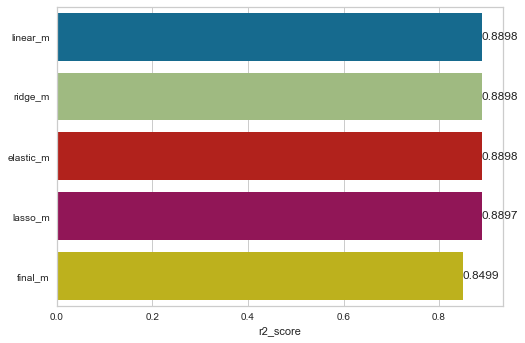

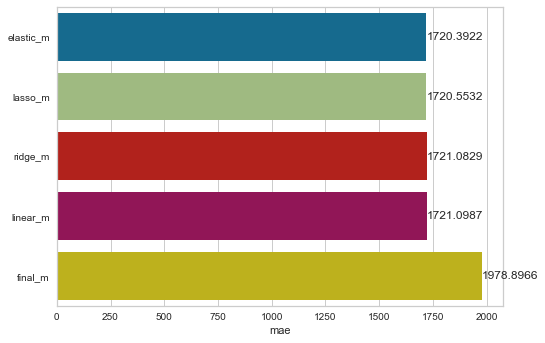

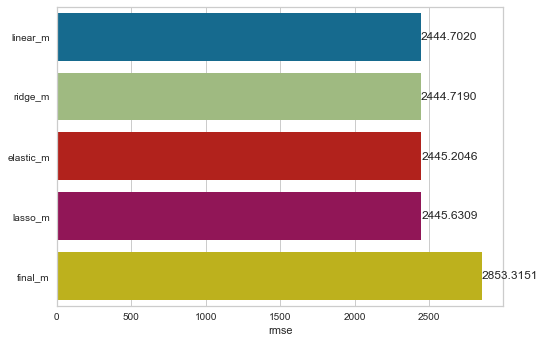

In [124]:
metrics = scores.columns
for i,j in enumerate(metrics):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

## Prediction new observation

In [125]:
columns_name = X.columns

In [126]:
final_scaler = MinMaxScaler()

In [127]:
final_scaler.fit(X)

MinMaxScaler()

In [128]:
X = final_scaler.transform(X)

In [129]:
lasso_final_model = Lasso(alpha=0.01)

In [130]:
#Deployment öncesi son egitimi tüm datam ile yapiyorum. Cünkü tüm analizlerim yukarida yapildi.
lasso_final_model.fit(X,y)

Lasso(alpha=0.01)

In [131]:
my_dict = {
    "hp_kW": 81,
    "age": 1,
    "km": 10000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [132]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,81,1,10000,Audi A3,Automatic


In [133]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,81,1,10000,1,1


In [134]:
my_dict = my_dict.reindex(columns=columns_name, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,81,10000,1,0,1,0,0,0,0,0,0,1,0,0


In [135]:
df_new.head()

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0


In [136]:
my_dict = final_scaler.transform(my_dict) ###########!!!!!!!!!!!!

In [137]:
my_dict

array([[0.12345679, 0.03154574, 0.33333333, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [138]:
lasso_final_model.predict(my_dict)

array([22715.39106008])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___